# Project Air Quality

The exercises on this sheet are graded by a maximum of 25 points. You will be asked to implement several functions.

Team work is not allowed. Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 

If you use any code fragments found on the Internet, make sure you reference them properly.

Notice: for Python packages, it is recommended to use seaborn 0.11, instead of seaborn 0.10.

<h3>Submission</h3>
Upload your solution to <a href="https://forms.gle/6qqmSaA95yFUD9bP9">this</a> google form 
until the <b> 07.04.22 23:59</b>

### Dataset: Air quality


The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer [1].

**Attributes of the dataset are:**

|Sl No|	|Attribute|	|Description|
|-|	|-|	|-|
|0|	|Date|	|Date (DD/MM/YYYY) |
|1|	|Time|	|Time (HH.MM.SS) |
|2|	|CO(GT)|	|True hourly averaged concentration CO in mg/m^3 (reference analyzer) |
|3|	|PT08.S1(CO)|	|PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)|
|4|	|NMHC(GT)|	|True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)|
|5|	|C6H6(GT)|	|True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) |
|6|	|PT08.S2(NMHC)|	|PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) |
|7|	|NOx(GT)|	|True hourly averaged NOx concentration in ppb (reference analyzer) |
|8|	|PT08.S3(NOx)|	|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) |
|9|	|NO2(GT)|	|True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) |
|10|	|PT08.S4(NO2)|	|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) |
|11|	|PT08.S5(O3)|	|PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) |
|12|	|T|	|Temperature in Â°C |
|13|	|RH|	|Relative Humidity (%) |
|14|	|AH|	|AH Absolute Humidity|


### Problem:

Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. 
The humidity of the air, if it is not maintained at optimal levels, can be a factor that has adverse affects on people's health. According to reports, the human body is said to be most comfortable when the relative humidity of the area ranges between 20 and 60%.


### Objective:

So we will **predict the Relative Humidity** of a given point of time based on the all other attributes affecting the change in RH.


### References:
[1] S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005


### <u>Content:<u>

[1) Load data ](#load_data) and [2) Basic statistics](#stat) (3 point)

[3) Data Cleaning](#hr) (3 point)
    
[4) Co-relation between variables](#corr)  (3 point)

[5) Influence of features on output-RH](#lin) (3 point)

[6) Baseline Linear Regression](#LR)  (4 points)

[7) Feature Engineering and testing model](#FE)  (4 points)

[8) Decision Tree Regression ](#DT), [9) Random Forest Regression](#RF),  [9.1) Blox plot](#bxplot), [10) Support Vector Machine](#SVM) (5 points)

[11) Conclusion](#conclusion)  (Bonus)


In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

#### 1) Load data<a name="load_data"></a>


- Use `pandas.read_csv('name',header=None,skiprows=1,names=col,na_filter=True, na_values=-200,usecols=use)` to load the data. 

- Visualize the first and the last 7 rows of the data.

In [2]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#define number of columns from csv
use = list(np.arange(len(col)))

#read the data from csv
df_air = pd.read_csv('AirQualityUCI.csv',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=use)

First 7 rows :

In [6]:
df_air.head(7)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603


Last 7 rows :

In [8]:
df_air.tail(7)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Print the dtypes in the dataframe 
- Print dataframe shape

In [9]:
df_air.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [10]:
df_air.shape

(9471, 15)

- Drop **ONLY** rows containing **ALL** NaN values 

NOTE: be careful on selecting `inplace=True`

In [12]:
df_air = df_air.dropna(how='all')

- Now, drop **ONLY** rows with a thresh = 10 NaN values

In [16]:
df_air = df_air.dropna(thresh=10)

- Print dataframe shape

In [17]:
df_air.shape

(8991, 15)

#### 2) Basic statistics<a name="stat"></a>

- Print dataframe statistics

In [18]:
df_air.describe(include='all')

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,8991,8991,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
unique,383,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,9/19/2004,9:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.129711,1099.833166,218.607666,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,NaN,NaN,1.436472,217.080037,206.615130,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813
min,NaN,NaN,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,NaN,NaN,1.100000,937.000000,66.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,NaN,NaN,1.800000,1063.000000,145.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,NaN,NaN,2.800000,1231.000000,297.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700


#### 3) Data Cleaning<a name="hr"></a>

In [19]:
#Split hour from time into new column
df_air['HOUR'] = df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
df_air.HOUR.head()

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

- ##### How many missing values now?

In [22]:
print('Count of missing values:\n', df_air.isnull().sum().sum())

Count of missing values:
 12944


##### Fill missing value strategy

-CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour

-NHHC_GT will be dropped as it has 90% missing data

In [23]:
df_air['DATE'] = pd.to_datetime(df_air.DATE, format='%m/%d/%Y')   #Format date column

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- set DATE as the index 

In [27]:
df_air = df_air.set_index('DATE')

In [28]:
#Create month column (Run this only once)

df_air['MONTH']=df_air.index.month     
df_air.reset_index(inplace=True)

- ##### Drop column NMHC_GT; it has 90% missing data

In [32]:
df_air = df_air.drop(columns='NMHC_GT')

##### Fill NaN values with monthly average of particular hour

In [33]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

- Print left missing values

In [34]:
print('Left out missing value: ', df_air.isnull().sum().sum())

Left out missing value:  552


In [35]:
# Fill left out NaN values with hourly average value

df_air['CO_GT'] = df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT'] = df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT'] = df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

#### 4) Understand correlation between variables<a name="corr"></a>

 - Use heatmap to see correlation between variables
 - Describe the heatmap using your own words


In [37]:
corr = df_air.corr()
corr.style.background_gradient(cmap ='coolwarm')

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
CO_GT,1.000000,0.846408,0.887265,0.876107,0.787576,-0.683850,0.682039,0.593213,0.818466,0.018214,0.019545,0.021548,0.387766,0.111150
PT08_S1_CO,0.846408,1.000000,0.883795,0.892964,0.685697,-0.771938,0.626975,0.682881,0.899324,0.048627,0.114606,0.135324,0.328035,-0.040345
C6H6_GT,0.887265,0.883795,1.000000,0.981950,0.689742,-0.735744,0.594909,0.765731,0.865689,0.198956,-0.061681,0.167972,0.344169,0.128537
PT08_S2_NMHC,0.876107,0.892964,0.981950,1.000000,0.677952,-0.796703,0.626970,0.777254,0.880578,0.241373,-0.090380,0.186933,0.389196,0.128246
NOX_GT,0.787576,0.685697,0.689742,0.677952,1.000000,-0.636602,0.754363,0.228499,0.753003,-0.244606,0.181493,-0.145377,0.253001,0.155003
PT08_S3_NOX,-0.683850,-0.771938,-0.735744,-0.796703,-0.636602,1.000000,-0.622794,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017,-0.323674,-0.061561
NO2_GT,0.682039,0.626975,0.594909,0.626970,0.754363,-0.622794,1.000000,0.158080,0.681128,-0.168311,-0.125927,-0.338924,0.401301,-0.178033
PT08_S4_NO2,0.593213,0.682881,0.765731,0.777254,0.228499,-0.538468,0.158080,1.000000,0.591144,0.561270,-0.032188,0.629641,0.221251,0.176311
PT08_S5_O3,0.818466,0.899324,0.865689,0.880578,0.753003,-0.796569,0.681128,0.591144,1.000000,-0.027172,0.124956,0.070751,0.245063,0.049029
T,0.018214,0.048627,0.198956,0.241373,-0.244606,-0.145112,-0.168311,0.561270,-0.027172,1.000000,-0.578621,0.656397,0.206642,0.282929


Description : from the heatmap we can see that the sensor responses and the true concentrations are strongly correlated, as well as the concentrations with respect to one another (negatively forPT08_S3_NOX, and with the exception of PT08_S4_NO2 and NOX_GT). The relative humidity is not particularly correlated with any of the sensor responses or true concentrations, it is however negatively correlated with temperature. 

#### 5) Try to understand degree of linearity between RH output and other input features<a name="lin"></a>

 - plot all X-features against output variable RH using `sns.lmplot`
 - describe the results

In [ ]:
#plot all X-features against output variable RH

In [55]:
df_air.columns

Index(['DATE', 'TIME', 'CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC',
       'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T',
       'RH', 'AH', 'HOUR', 'MONTH'],
      dtype='object')

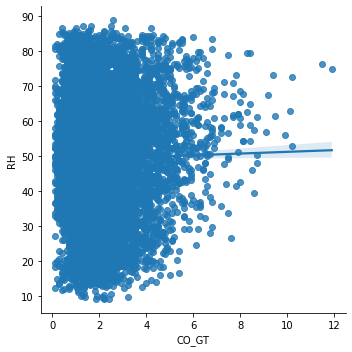

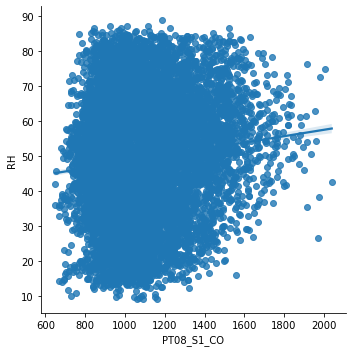

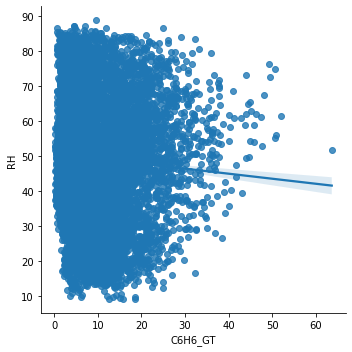

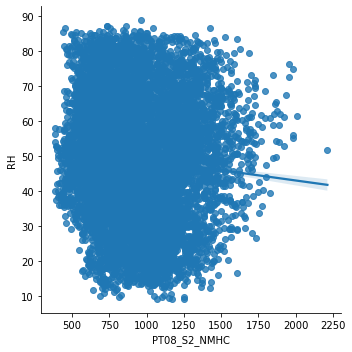

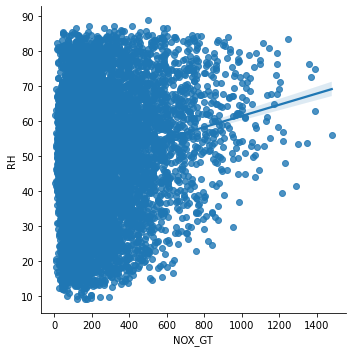

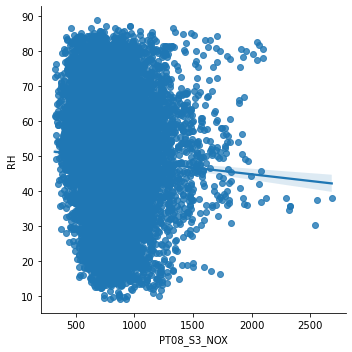

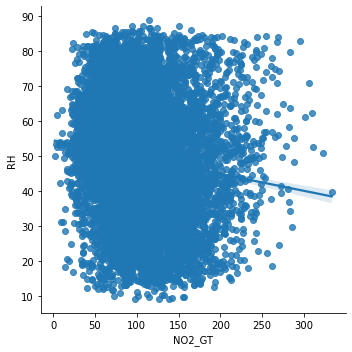

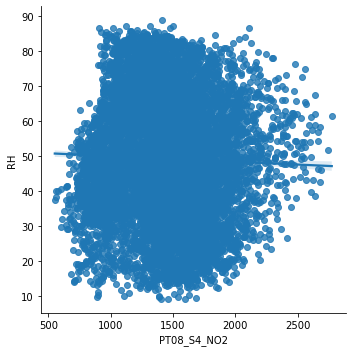

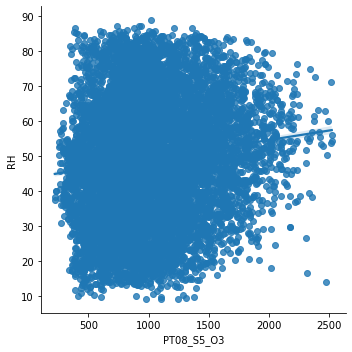

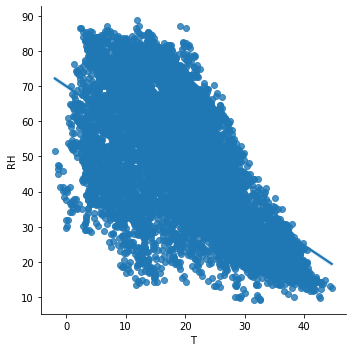

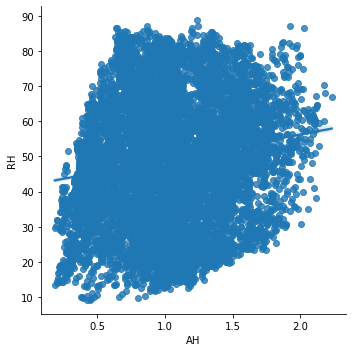

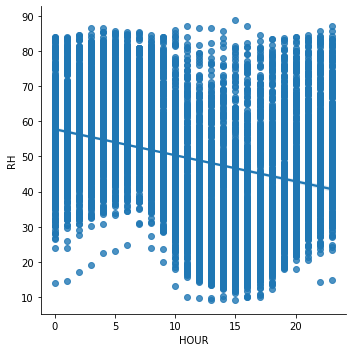

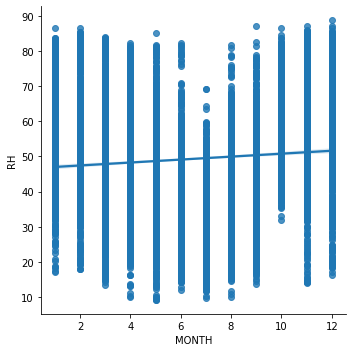

In [56]:
for x_feat in ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT',
       'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR', 'MONTH'] :

    sns.lmplot(data=df_air, x=x_feat, y='RH')

Description : for most X-features, the results are inconclusive, we cannot say anything on their degree of linearity with the relative humidity. Temperature, however, and RH seem to be negatively correlated.

### 6) Linear Regression<a name="LR"></a>

In [53]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

- ##### Define Feature (X) and Target (y)

In [57]:
X = df_air[['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT',
       'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR', 'MONTH']]    #X-input features
y = df_air[['RH']]          #y-input features

- Plot distribution of target variable. Do we need to use stratified splitting of the data? Why?

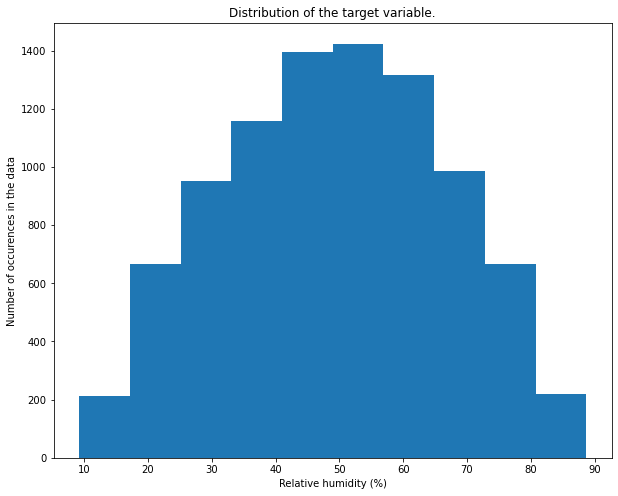

In [62]:
n, bins, patches = plt.hist(y['RH'].values)
plt.xlabel('Relative humidity (%)')
plt.ylabel('Number of occurences in the data')
plt.title('Distribution of the target variable.')
plt.show()

The data being normally distributed, we do not need to use stratified sampling.

- ##### Train test split
split the data into train and test with test size and 30% and train size as 70%, use a random seed

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
print('Training data size: ', X_train.shape[0])
print('Test data size: ', X_test.shape[0])

Training data size:  6293
Test data size:  2698


- ##### Normalize data using `StandardScaler`

In [65]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X=X_train, y=y_train)
X_test_sc = scaler.transform(X_test)

 - ##### Train the Linear Regression model

In [107]:
regressor = LinearRegression()

In [108]:
regressor.fit(X = X_train_sc, y = y_train['RH'].values)

LinearRegression()

- Print intercept and slope

Intercept :

In [110]:
regressor.intercept_

49.17484506594628

Slope :

In [111]:
regressor.coef_

array([ -1.70630882,   3.38747673,  -5.61151602,  -1.18374015,
         3.48446957,  -0.70251768,  -1.10381783,   6.8106177 ,
        -1.27951409, -20.24400187,  12.10590034,  -0.61815824,
         1.33723329])

- Predict on the test data
- Compute and print performance metrics as RMSE. This will be our baseline

Prediction :

In [114]:
y_pred = regressor.predict(X_test_sc)

RMSE :

In [118]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))

6.012894371219269

#### <u>6a) Conclusion of baseline linear regression model:<a name="LRcon"></a>

I would say the RMSE is quite high, so we should definitely look into feature engineering and more complex models.

### 7) Feature engineering and testing model:<a name="FE"></a>

Try with multiple feature combination and see if RMSE is improving

- ##### write function to measure RMSE with different combinations of features (try at least 6 combinations of your choice)

(remember to comment the function!)

In [121]:
import random

In [253]:
def train_test_RMSE(df_air, feat_):
    
    '''
    The function train_test_RMSE returns the RMSE for different combinations 
    of features feat_ of the dataframe df_air'''
    
    # extract only the columns from df_air we care about for x features
    XR = df_air[feat_]
    # we still predict RH
    yR = df_air[['RH']]
    # train-test split
    X_trainR, X_testR, y_trainR, y_testR = train_test_split(XR, yR, test_size=0.3, random_state=42)
    # apply standard scaling and fit the data
    scalerR = StandardScaler()
    X_train_scR = scaler.fit_transform(X=X_trainR, y=y_trainR)
    X_test_scR = scaler.transform(X_testR)
    # train the linear regression
    regressorR = LinearRegression()
    regressorR.fit(X = X_train_scR, y = y_trainR['RH'].values)
    # predict
    y_predR = regressorR.predict(X_test_scR)
    
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [255]:
# all possible features
all_features = ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT',
       'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR', 'MONTH']

In [260]:
# as i will be using random functions, set the seed
random.seed(42)
# trying out 6 combinations
for _ in range(6) : 
    # select a subset of the features, of random size (between 5 and 12 samples)
    feats = random.sample(all_features, np.random.randint(low=5, high=12))
    print('Subset : ', ', '.join(feats))
    print('RMSE : ', train_test_RMSE(df_air, feats))
    print()

Subset :  AH, PT08_S1_CO, CO_GT, NOX_GT, PT08_S2_NMHC, PT08_S5_O3, HOUR, PT08_S3_NOX, MONTH
RMSE :  13.197007655004441

Subset :  AH, HOUR, PT08_S5_O3, PT08_S1_CO, NO2_GT, CO_GT
RMSE :  15.941487662079515

Subset :  CO_GT, PT08_S1_CO, PT08_S2_NMHC, AH, PT08_S5_O3, MONTH, NOX_GT, HOUR, NO2_GT, T, PT08_S4_NO2
RMSE :  6.128575324224552

Subset :  PT08_S4_NO2, T, NOX_GT, CO_GT, C6H6_GT, NO2_GT, PT08_S5_O3
RMSE :  8.896244301374132

Subset :  NOX_GT, C6H6_GT, PT08_S2_NMHC, PT08_S3_NOX, PT08_S1_CO, PT08_S5_O3, AH
RMSE :  13.546779074103874

Subset :  PT08_S1_CO, PT08_S3_NOX, HOUR, T, NOX_GT, CO_GT, AH, PT08_S2_NMHC
RMSE :  6.333210986997516



#### <u>7a) Conclusion of Feature Engineering and testing:<a name="FEcon"></a>

After trying some sub-combinations of the features, none of which improved the RMSE, we should make the most out of it by using all of them and using a more complex model.

### 8) Decision Tree Regression<a name="DT"></a>

Let us try to apply Decision tree regression technique and see if any improvement happens

In [137]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv

- ##### Fit the DT model and predict:

In [141]:
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train_sc, y_train['RH'].values)
y_pred = regressor.predict(X_test_sc)

- ##### RMSE of RH prediction

In [142]:
#calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print('RMSE of Decision Tree Regression: ', rmse)

RMSE of Decision Tree Regression:  1.3525653083193758


#### <u>Conclusion:<u>(Decision Tree Regression)

Decision Tree Regression does give (much) better results than Linear Regression ! But we can still improve upon it.

### 9) Random Forest Regression<a name="RF"></a>

- apply Random Forest regression and measure RMSE

In [144]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor

- ##### Fit the RF model and predict

In [145]:
regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train_sc, y_train['RH'].values)
y_pred = regressor.predict(X_test_sc)

- ##### RMSE of RH prediction

In [166]:
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true=y_test['RH'].values, y_pred=y_pred))
print('RMSE of predicted RH in RF model: ', rmse)

RMSE of predicted RH in RF model:  0.6872443005859846


--------

- ##### Try to improve on baseline RF model: use `GridSearchCV` to search between different hyperparameters and plot the resulting RMSE
    - use different numbers of estimators
    - use cv of 5 or 10
    - use the correct scoring function
    - then, use the best model hyperparameters to predict on the test data

In [154]:
# parameters grid to be used for GridSearchCV
params = {'n_estimators': [50, 100, 150, 200],
         'max_depth' : [None, 5],
         'min_samples_split' : [2, 4]}

In [155]:
# grid search with cv=5
gs_5 = GridSearchCV(RandomForestRegressor(random_state = 42),
                      param_grid = params,
                      scoring = 'neg_root_mean_squared_error',
                      cv = 5)
gs_5.fit(X_train_sc, y_train['RH'].values)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5], 'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_root_mean_squared_error')

In [156]:
# corresponding results
print(gs_5.best_params_)
print(- gs_5.score(X_test_sc, y_test))

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
0.6870446919441936


In [157]:
# grid search with cv=10
gs_10 = GridSearchCV(RandomForestRegressor(random_state = 42),
                      param_grid = params,
                      scoring = 'neg_root_mean_squared_error',
                      cv = 10)
gs_10.fit(X_train_sc, y_train['RH'].values)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5], 'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_root_mean_squared_error')

In [158]:
# corresponding results
print(gs_10.best_params_)
print(- gs_10.score(X_test_sc, y_test))

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
0.6870446919441936


Best reached score:

In [160]:
best_rf_score = - gs_10.score(X_test_sc, y_test)
print('RMSE using RF grid search method : ', best_rf_score)  

RMSE using RF grid search method :  0.6870446919441936


- Write here your conclusions regarding the Grid Search method. Did the performance improve? How much?

The performance improved, but not very significantly (barely 0.0002). Notably, for the hyperparameters `max_depth` and `min_samples_split`, the optimal parameter found by the GridSearch are the default parameters. On the other hand, the optimal `n_estimators` found is the max. one provided. I would not increase this parameter too much, because of the risk of overfitting to the training data.

- ### Plot box plots of the error <a name="bxplot"></a>

    - how are the error distributed over different ranges of RH?
    - plot the box plots of absolute errors vs different output range) 

In [199]:
import math

def roundup(x): 
    """
        Function to round the number `x` to the nearest upper multiple of 10.
        Inspired from https://stackoverflow.com/questions/26454649/python-round-up-to-the-nearest-ten
    """
    x = float(x)
    if x == 0 : return 10
    return int(math.ceil(x / 10.0)) * 10


# get the prediction
y_pred = gs_10.predict(X_test_sc)

# first, i split y_test (and the corresponding y_pred) based on the value of y_test (split in buckets of 10%)
upper_bounds = np.arange(10, 101, 10) #the 10%-buckets
errors_dict = dict(zip(upper_bounds, ([[],[]] for _ in upper_bounds))) # init. dict with values [y_true, y_pred]

# iterate over y_test (and the corresponding y_pred) and populate errors_dict
for true, pred in zip(y_test.values.flatten(), y_pred) :
    rounded_true = roundup(true)
    errors_dict[rounded_true][0].append(true)
    errors_dict[rounded_true][1].append(pred)

# now, calculate absolute error between y_test and y_pred for each 10%-bucket
data = []
for bucket, vals in errors_dict.items():
    bucket_y_true = vals[0]
    bucket_y_pred = vals[1]
    # need to do this if/else because np.subtract can't handle empty lists
    if len(bucket_y_true) > 0 : 
        abs_error = np.abs(np.subtract(bucket_y_true,bucket_y_pred))
        data.append(abs_error)
    else: data.append([])

# define xticks for the plot
labels = [str(int(x-10)) + '-' + str(int(x)) for x in list(errors_dict.keys())]

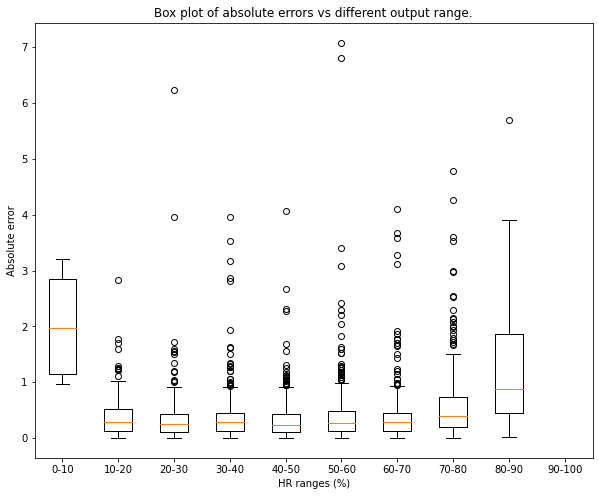

In [237]:
# and plot
plt.boxplot(data)
plt.xticks(np.arange(1,len(data)+1), labels)
plt.title('Box plot of absolute errors vs different output range.')
plt.xlabel('HR ranges (%)')
plt.ylabel('Absolute error')
plt.show()

#### <u>Conclusion: Random Forest

Comparing this plot with the one depicting the distribution of the variable, we can see that the absolute error is the highest for HR ranges for which we have less data, and lowest for HR ranges for which we have more data. This might be an indication that we may be overfitting to the training data.

### 10) Support Vector Machine<a name="SVM"></a>

- apply SVR and measure RMSE

In [238]:
from sklearn.svm import SVR           #import support vector regressor

In [239]:
svr = SVR()

In [245]:
def reshape_fun(y) :
    # Basic reshape function for SVR to handle the input
    return y.values.reshape(len(y.values))

In [247]:
svr.fit(X_train_sc, reshape_fun(y_train))
y_pred = svr.predict(X_test_sc)

In [249]:
#Calculate RMSE of SVR
print('RMSE of SVR model: ', np.sqrt(mean_squared_error(y_true=reshape_fun(y_test), y_pred=y_pred)))

RMSE of SVR model:  3.9247455805267712


Comment : Not sure whether I messed up something or whether this is expected. I thought SVR would work better. Thoughts: 
- Maybe using an underlying classification algorithm to predict a continuous variable is not optimal in this case. 
- Or the default kernel is not suited for the task. 
- Or maybe it's a too complicated algorithm for the fairly simple task at hand!

## Conclusion:<a name="conclusion"></a>


- Baseline Linear Regression

As expected, the baseline Linear Regression performed quite poorly. Indeed, the relationship between the variable to be predicted and the features not being linear, the model could not learn a good relationship.

- Decision Tree Regression

Decision Tree Regression performed much better than Linear Regression, due to its non-linear nature.

- Random Forest Regression

As expected, being an ensemble of Decision Trees, the Random Forest model outperformed the Decision Tree model. 

- Support Vector Machine

However, the Support Vector Regression performed poorly (better than Linear Regression, but worse than Decision Tree). My take is that it might be a too complex model for a fairly simple task, leading to overfitting on the training data and poor generalization abilities, leading to a high RMSE on the test data.
